### Importaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, exp, sin, pi

### Definicion de la funcion

Nuestra funcion por defecto es $f(t,x) = x$  
( Más adelante veremos que podemos cambiar la función si se requiere)

In [2]:
def funcion_f(ecuacion:str="x"):
    function = sp.sympify(ecuacion)
    return function

*Digite el numero de iteraciones deseadas:*

In [3]:
numero_iteraciones = 10

*Digite el valor inicial en t:*

In [4]:
paso_inicial_T = 0

*Digite el valor final en t:*

In [5]:
paso_final_T = 10

*Digite la condicion inicial de $x(t)$:*

In [6]:
paso_inicial_X = 1

*A continuación calcularemos el $\Delta t$*

In [7]:
delta_T = (paso_final_T - paso_inicial_T)/numero_iteraciones
delta_T

1.0

### Iniciemos con la solucion exacta

In [8]:
# Definir la variable independiente 
t = symbols('t')

# Esta es una funcion que depende de t
x = Function('x')(t)

#funcion_m = sin(t)
#funcion_m = (2*t*(1+x**2))
funcion_m = x
# Definir la ecuación diferencial (Homogenea)
edo = x.diff(t) - funcion_m
# Resolver la ecuación diferencial y darle su valor inicial

solucion = dsolve(edo, x, ics={x.subs(t, 0): paso_inicial_X})
solucion

Eq(x(t), exp(t))

In [9]:
# Creamos una lista con un solo elemento de nuestro valore inicial de t
vector_T_funcion_real = np.array([paso_inicial_T])
        
# Iteramos para crear el vector para realizar la graficación de la funcion exacta
for iteracion in range(numero_iteraciones*10):
    t_i = (vector_T_funcion_real[iteracion] + delta_T/ 10) 
    vector_T_funcion_real = np.append(vector_T_funcion_real, t_i)

# Evaluamos la función en cada valor de tiempo y almacenamos los resultados en una lista
vector_f_solucion = [solucion.rhs.subs({t: valor}) for valor in list(vector_T_funcion_real)]

### Definición de las variables simbolicas

In [10]:
t, x = sp.symbols('t x')

### Si requerimos cambiar la funcion, aqui la definimos:

In [11]:
#fun = "(2*t*(1+x**2))"
fun =  "x"
#fun = "sin(t)"

Creamos la funcion programatica $f$  
Como parametro tenemos la funcion que creamos, si no le pasamos este parametro usa nuestra funcion por defecto

In [12]:
func_f = funcion_f(fun)
func_f

x

## Metodo de Euler

$x_{k+1} = x_{k} + f(t_{k},x_{k})\Delta t$

In [13]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_euler_pequeño = np.array([paso_inicial_T])
vector_X_euler_pequeño = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones*10):
    dic_evaluar = {
        t: vector_T_euler_pequeño[iteracion],
        x: vector_X_euler_pequeño[iteracion]
    }
    t_i = vector_T_euler_pequeño[iteracion] + delta_T/10
    x_i = vector_X_euler_pequeño[iteracion] + func_f.subs(dic_evaluar) * delta_T/10

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_T_euler_pequeño = np.append(vector_T_euler_pequeño, t_i)
    vector_X_euler_pequeño = np.append(vector_X_euler_pequeño, x_i)

In [14]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_euler = np.array([paso_inicial_T])
vector_X_euler = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_evaluar = {
        t: vector_T_euler[iteracion],
        x: vector_X_euler[iteracion]
    }
    t_i = vector_T_euler[iteracion] + delta_T
    x_i = vector_X_euler[iteracion] + func_f.subs(dic_evaluar) * delta_T

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_T_euler = np.append(vector_T_euler, t_i)
    vector_X_euler = np.append(vector_X_euler, x_i)

### Si requiere ver los vectores resultantes basta expandir y correr las siguientes celdas

In [15]:
len(vector_T_funcion_real)

101

In [16]:
vector_f_solucion[61]

445.857770082514

In [17]:
vector_T_euler_pequeño

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [18]:
vector_X_euler_pequeño

array([1, 1.10000000000000, 1.21000000000000, 1.33100000000000,
       1.46410000000000, 1.61051000000000, 1.77156100000000,
       1.94871710000000, 2.14358881000000, 2.35794769100000,
       2.59374246010000, 2.85311670611000, 3.13842837672100,
       3.45227121439310, 3.79749833583241, 4.17724816941565,
       4.59497298635722, 5.05447028499294, 5.55991731349223,
       6.11590904484146, 6.72749994932560, 7.40024994425816,
       8.14027493868398, 8.95430243255237, 9.84973267580761,
       10.8347059433884, 11.9181765377272, 13.1099941914999,
       14.4209936106499, 15.8630929717149, 17.4494022688864,
       19.1943424957751, 21.1137767453526, 23.2251544198878,
       25.5476698618766, 28.1024368480643, 30.9126805328707,
       34.0039485861577, 37.4043434447735, 41.1447777892509,
       45.2592555681760, 49.7851811249936, 54.7636992374929,
       60.2400691612422, 66.2640760773664, 72.8904836851031,
       80.1795320536134, 88.1974852589747, 97.0172337848722,
       106.7189571633

In [19]:
vector_T_euler

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [20]:
vector_X_euler

array([1, 2.00000000000000, 4.00000000000000, 8.00000000000000,
       16.0000000000000, 32.0000000000000, 64.0000000000000,
       128.000000000000, 256.000000000000, 512.000000000000,
       1024.00000000000], dtype=object)

### Grafiquemos

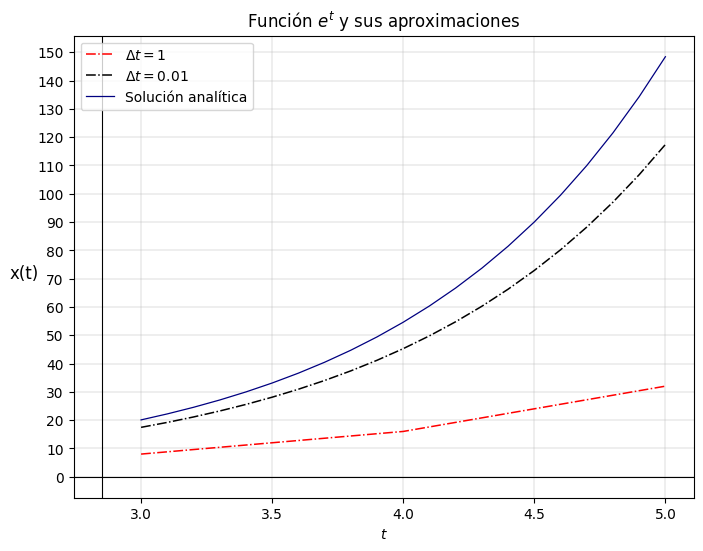

In [23]:
plt.figure(figsize=(8, 6))
plt.text(2.5, 70, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(2, 6, 0.5))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(0, 200, 10))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(2.85, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vector_T_euler[3:6],
    vector_X_euler[3:6],
    label="$\Delta t = 1$",
    color='red',
    linestyle='-.',
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_euler_pequeño[30:51],
    vector_X_euler_pequeño[30:51],
    label="$\Delta t = 0.01$",
    color='black',
    linestyle='-.',
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real[30:51],
    vector_f_solucion[30:51],
    label="Solución analítica",
    color='navy',
    linestyle='solid',
    linewidth=0.9,
    markersize=12, 
)
plt.legend(loc='upper left')  # Esto coloca la leyenda en la esquina superior izquierda
plt.title(r"Función $e^t$ y sus aproximaciones")
plt.savefig("Función $e^t$ y sus aproximaciones.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()